## Лабораторная 4. Линейная регрессия

[Линейная регрессия. Теоретическая часть](https://www.notion.so/1-f2323e041d6a435191b76b0bc088f106?pvs=21)

**Задание**

- Выбор датасетов:
  - Студенты с **нечетным** порядковым номером в группе должны использовать [про обучение студентов](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
- Разделите данные на обучающий и тестовый наборы данных.
- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.
- Постройте **три модели** с различными наборами признаков.
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.
- Бонусное задание
    - Ввести синтетический признак при построении модели

### Step 1: Installing Libraries

This step is usually done once. If you already have these libraries installed, you can skip this step.

In [1]:
# Install necessary libraries
# !pip install pandas matplotlib numpy

### Step 2: Importing Libraries and define helper functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
def print_bold(text):
    BOLD = '\033[1m'
    END = '\033[0m'
    print('-' * 100 + f"\n{BOLD}{text}{END}")

In [4]:
def r_squared(y_actual, y_predicted):
    ss_total = np.sum((y_actual - np.mean(y_actual)) ** 2)
    ss_residual = np.sum((y_actual - y_predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

### Step 3: Performing tasks

**Task 1:** Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [5]:
print_bold("Load the dataset")
df = pd.read_csv('Student_Performance.csv')

print_bold("Display the size of the dataset")
print(df.shape)

print_bold("Display basic statistics")
stats = df.describe()
print(stats)

----------------------------------------------------------------------------------------------------
Load the dataset
----------------------------------------------------------------------------------------------------
Display the size of the dataset
(10000, 6)
----------------------------------------------------------------------------------------------------
Display basic statistics
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000

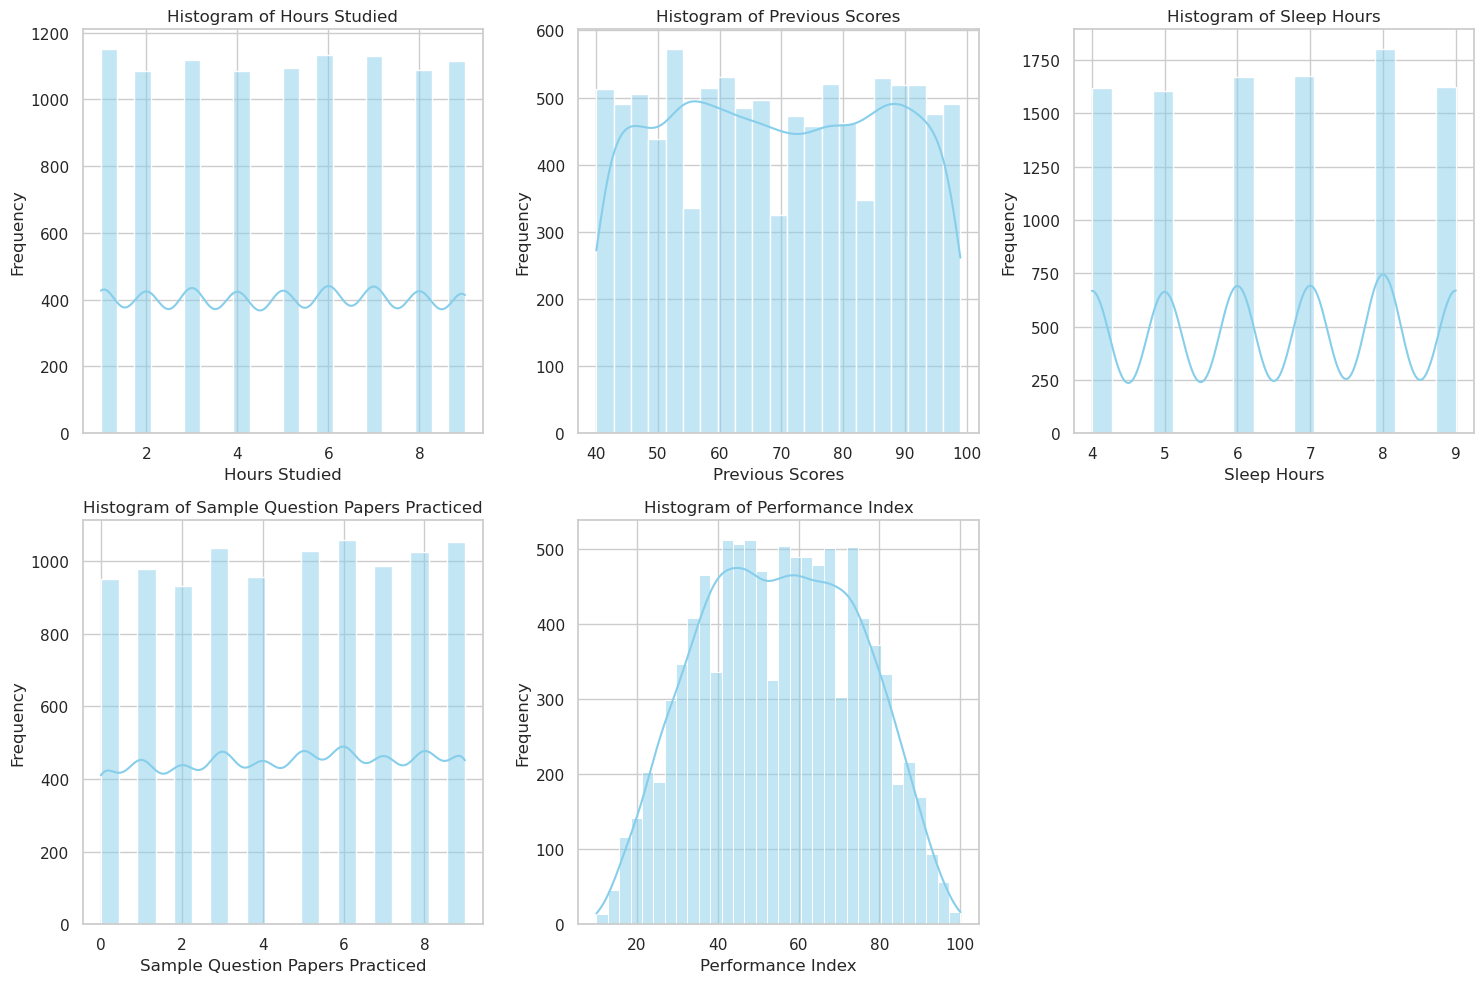

In [6]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the overall figure size for histograms
plt.figure(figsize=(15, 10))

# Plot histograms for numeric columns
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and show the histograms
plt.tight_layout()
plt.show()

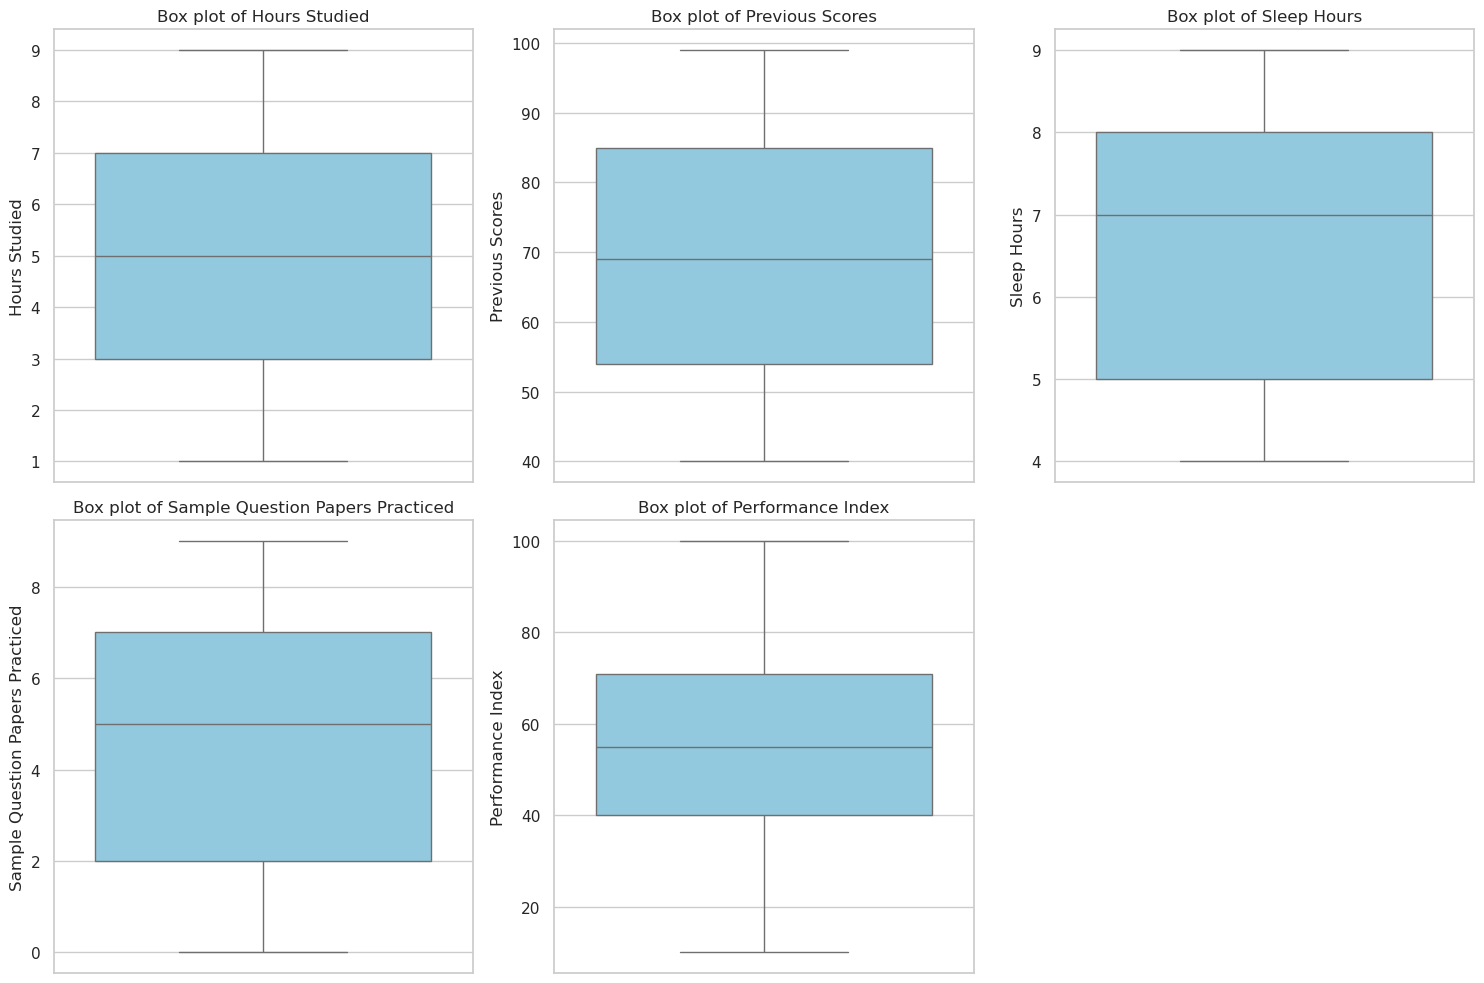

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the overall figure size for box plots
plt.figure(figsize=(15, 10))

# Define a new color for the box plots
boxplot_color = 'skyblue'  # Feel free to choose any color you prefer

# Plot box plots for numeric columns
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[column], color=boxplot_color)
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)

# Adjust layout and show the box plots
plt.tight_layout()
plt.show()

**Task 2:** Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [8]:
print_bold("Handling Missing Values")
# Option 1: Fill missing values with mean/median
# df.fillna(df.mean(), inplace=True)

# Option 2: Drop rows with missing values
df.dropna(inplace=True)

# Step 2: Encoding Categorical Features
# Using LabelEncoder for the 'Extracurricular Activities' column
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

# Step 3: Normalization
# Using MinMaxScaler for normalization
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

print_bold("Display the first few rows of the processed dataset")
print(df.head())

print_bold("Display the sizes of the processed dataset")
print(df.shape)

----------------------------------------------------------------------------------------------------
Handling Missing Values
----------------------------------------------------------------------------------------------------
Display the first few rows of the processed dataset
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.750         1.000000                         1.0          1.0   
1          0.375         0.711864                         0.0          0.0   
2          0.875         0.186441                         1.0          0.6   
3          0.500         0.203390                         1.0          0.2   
4          0.750         0.593220                         0.0          0.8   

   Sample Question Papers Practiced  Performance Index  
0                          0.111111           0.900000  
1                          0.222222           0.611111  
2                          0.222222           0.388889  
3                        

After completing the preliminary data processing, the size of the dataset remains unchanged, indicating that the dataset does not contain any null values. Additionally, the 'Yes' and 'No' values in the 'Extracurricular Activities' column have been successfully converted to numerical values 0 and 1, respectively.

**Task 3:** Разделите данные на обучающий и тестовый наборы данных.

In [9]:
# Assuming 'Performance Index' is the target variable
X = df.drop('Performance Index', axis=1)  # Features
y = df['Performance Index']                # Target

# Split the data into training and testing sets
# test_size defines the proportion of the test set, usually between 0.2 and 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (8000, 5)
Test set size: (2000, 5)


**Task 4:** Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [10]:
# We need to add a column of ones to X_train for the intercept term.
X_train = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)

In [11]:
# Calculate the Coefficients Using the Least Squares Method
def least_squares(X, y):
    X_transpose = X.T
    coefficients = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return coefficients

b = least_squares(X_train, y_train)

In [12]:
# Making Predictions
def predict(X, b):
    return X.dot(b)
    
y_test_pred = predict(X_test, b)

In [13]:
# Evaluating the model on the test set
mse_test = np.mean((y_test - y_test_pred)**2)
r_squared_test = r_squared(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r_squared_test}")

Test Mean Squared Error: 0.0005040281973483783
Test R-squared: 0.9889832909573145


**Task 5:** Постройте три модели с различными наборами признаков.

In [14]:
# Assuming these are the column names in your dataframe 'df'
features_set_1 = ['Hours Studied', 'Previous Scores']
features_set_2 = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities']
features_set_3 = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

In [15]:
# Splitting the first set of features
X1 = df[features_set_1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Splitting the second set of features
X2 = df[features_set_2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Splitting the third set of features
X3 = df[features_set_3]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

In [16]:
# Training the Models
# Function for adding a column of ones (for the intercept) and computing coefficients
def prepare_and_train(X, y):
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
    return least_squares(X, y)

# Training each model
b1 = prepare_and_train(X1_train, y1_train)
b2 = prepare_and_train(X2_train, y2_train)
b3 = prepare_and_train(X3_train, y3_train)

In [17]:
# Making predictions
y1_pred = predict(np.append(np.ones((X1_test.shape[0], 1)), X1_test, axis=1), b1)
y2_pred = predict(np.append(np.ones((X2_test.shape[0], 1)), X2_test, axis=1), b2)
y3_pred = predict(np.append(np.ones((X3_test.shape[0], 1)), X3_test, axis=1), b3)

**Task 6:** Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.

In [18]:
print_bold("Evaluating models using MSE")
mse1 = np.mean((y1_test - y1_pred)**2)
mse2 = np.mean((y2_test - y2_pred)**2)
mse3 = np.mean((y3_test - y3_pred)**2)

print(f"Model 1 MSE: {mse1}")
print(f"Model 2 MSE: {mse2}")
print(f"Model 3 MSE: {mse3}")

print_bold("Calculate R-squared for each model")
r2_model_1 = r_squared(y1_test, y1_pred)
r2_model_2 = r_squared(y2_test, y2_pred)
r2_model_3 = r_squared(y3_test, y3_pred)

# Print the R-squared values
print(f"Model 1 R-squared: {r2_model_1}")
print(f"Model 2 R-squared: {r2_model_2}")
print(f"Model 3 R-squared: {r2_model_3}")

----------------------------------------------------------------------------------------------------
Evaluating models using MSE
Model 1 MSE: 0.0006471507637717924
Model 2 MSE: 0.0006343307367748254
Model 3 MSE: 0.0005163277672338044
----------------------------------------------------------------------------------------------------
Calculate R-squared for each model
Model 1 R-squared: 0.985855014245765
Model 2 R-squared: 0.9861352257658504
Model 3 R-squared: 0.9887144552384186


**Task 7:** Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.

1. **MSE (Mean Squared Error):** Indicates the average squared difference between the estimated values and the actual value. A lower MSE is better, as it indicates that the model's predictions are closer to the actual data.

2. **R squared:** Reflects the proportion of the variance for the dependent variable that's explained by the independent variables in the model. An R-squared value closer to 1 indicates a better fit of the model to the data.

#### Model Performance Comparison:

1. **Mean Squared Error (MSE)**:
   - Model 1: MSE = 0.000647
   - Model 2: MSE = 0.000634
   - Model 3: MSE = 0.000516
   
   **Conclusion**: Model 3 has the lowest MSE, indicating it has the highest predictive accuracy among the three models. Model 2 is slightly better than Model 1, but the improvement is marginal.

2. **R-squared**:
   - Model 1: R-squared = 0.9859
   - Model 2: R-squared = 0.9861
   - Model 3: R-squared = 0.9887
   
   **Conclusion**: Model 3 also has the highest R-squared value, suggesting it best fits the data compared to the other two models. Model 2 shows a slight improvement over Model 1 in terms of the goodness of fit.

#### Feature Effectiveness:

- **Model 1**: Included basic features like 'Hours Studied' and 'Previous Scores'.
- **Model 2**: Added 'Extracurricular Activities' to the features of Model 1.
- **Model 3**: Included more comprehensive features ('Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced').

#### Conclusions:

- The incremental inclusion of features from Model 1 to Model 3 shows a consistent improvement in both MSE and R-squared values. This indicates that the additional features in each subsequent model contribute positively to the model's predictive power and fit.
- The most significant improvement is observed in Model 3, where the inclusion of 'Sleep Hours' and 'Sample Question Papers Practiced', along with the features from Model 2, leads to the best performance. This suggests that these additional features are important predictors for the target variable.
- The slight improvement from Model 1 to Model 2 indicates that 'Extracurricular Activities' has a smaller, yet positive, impact on the model's performance.

**Bonus task:** Ввести синтетический признак при построении модели

In [19]:
 # Creating a Synthetic Feature
df['Study_Papers_Interaction'] = df['Hours Studied'] * df['Sample Question Papers Practiced']

In [20]:
X = df.drop(['Performance Index', 'Hours Studied', 'Sample Question Papers Practiced'], axis=1)
y = df['Performance Index']                # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a column of ones for the intercept
X_train = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)

In [21]:
b = least_squares(X_train, y_train)

In [22]:
y_pred = predict(X_test, b)

# Evaluate the model
mse = np.mean((y_test - y_pred)**2)
r_squared = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print(f"Model with Synthetic Feature - MSE: {mse}")
print(f"Model with Synthetic Feature - R-squared: {r_squared}")

Model with Synthetic Feature - MSE: 0.0039455343165930865
Model with Synthetic Feature - R-squared: 0.9137611669098874


The inclusion of the synthetic feature, while excluding the original features it was derived from, has led to a good but slightly reduced model performance compared to the models that included these original features.